In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from scipy.signal import savgol_filter
%matplotlib inline
pd.set_option('expand_frame_repr', False)

def line(x, a, b):
    return a*x + b

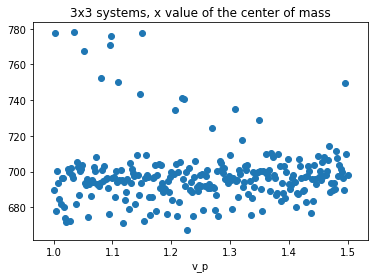

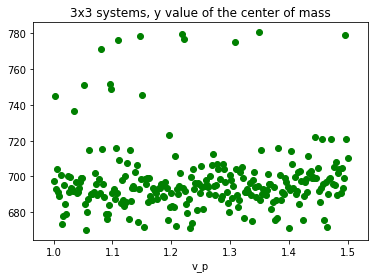

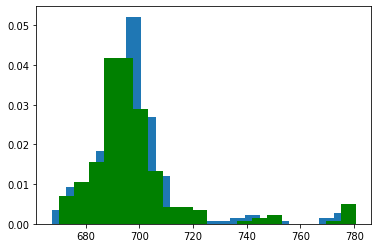

In [42]:
scaling = np.loadtxt('scaling_vp.dat')
x = np.linspace(1, 1+256/512, 256)
plt.title('3x3 systems, x value of the center of mass')
plt.scatter(x, scaling[:, 0])
plt.xlabel('v_p')
plt.show()
plt.scatter(x, scaling[:, 1], color='green')
plt.title('3x3 systems, y value of the center of mass')
plt.xlabel('v_p')
plt.show()
plt.hist(scaling[:, 0], bins=20, density=True)
plt.hist(scaling[:, 1], bins=20, color='green', density=True)
plt.show()

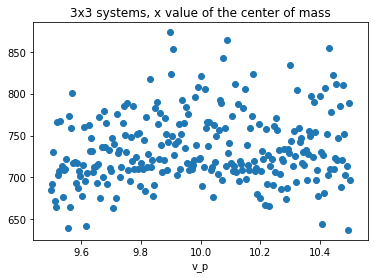

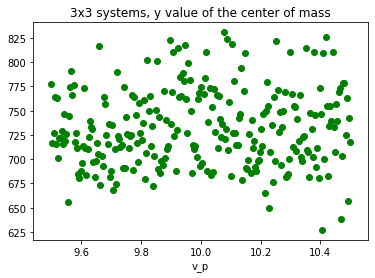

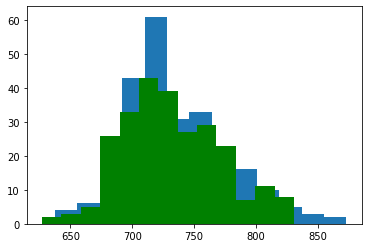

In [40]:
scaling = np.loadtxt('scaling_high_vp.dat')
x = np.linspace(9.5, 9.5+256/256, 256)
plt.title('3x3 systems, x value of the center of mass')
plt.scatter(x, scaling[:, 0])
plt.xlabel('v_p')
plt.show()
plt.scatter(x, scaling[:, 1], color='green')
plt.title('3x3 systems, y value of the center of mass')
plt.xlabel('v_p')
plt.show()
plt.hist(scaling[:, 0], bins=13)
plt.hist(scaling[:, 1], bins=13, color='green')
plt.show()

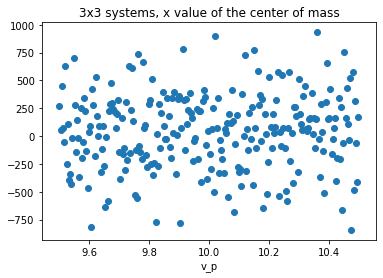

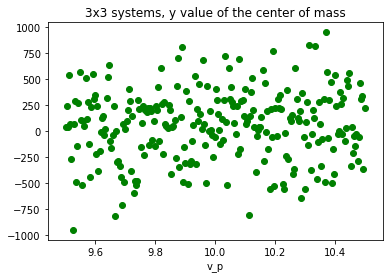

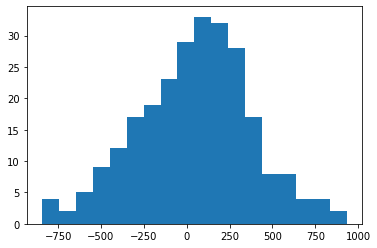

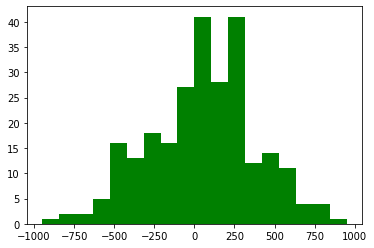

In [2]:
scaling = np.loadtxt('scaling_low_scale.dat')
x = np.linspace(9.5, 9.5+256/256, 256)
plt.title('3x3 systems, x value of the center of mass')
plt.scatter(x, scaling[:, 0])
plt.xlabel('v_p')
plt.show()
plt.scatter(x, scaling[:, 1], color='green')
plt.title('3x3 systems, y value of the center of mass')
plt.xlabel('v_p')
plt.show()
plt.hist(scaling[:, 0], bins=18)
plt.show()
plt.hist(scaling[:, 1], bins=18, color='green')
plt.show()

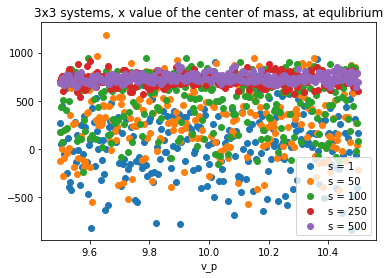

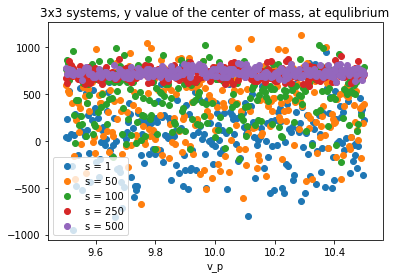

In [3]:
#scaling = np.loadtxt('scaling_vp.dat')
scaling_2 = np.loadtxt('scaling_low_scale.dat')
scaling_3 = np.loadtxt('scaling_high_vp.dat')
scaling_4 = np.loadtxt('scaling_vp_100.dat')
scaling_5 = np.loadtxt('scaling_vp_250.dat')
scaling_6 = np.loadtxt('scaling_vp_50.dat')

x = np.linspace(9.5, 9.5+256/256, 256)
plt.title('3x3 systems, x value of the center of mass, at equlibrium')
plt.scatter(x, scaling_2[:, 0], label='s = 1')
plt.scatter(x, scaling_6[:, 0], label='s = 50')
plt.scatter(x, scaling_4[:, 0], label = 's = 100')
plt.scatter(x, scaling_5[:, 0], label= 's = 250')
plt.scatter(x, scaling_3[:, 0], label = 's = 500')
plt.xlabel('v_p')
plt.legend()
plt.show()
plt.title('3x3 systems, y value of the center of mass, at equlibrium')
x = np.linspace(9.5, 9.5+256/256, 256)
plt.scatter(x, scaling_2[:, 1], label='s = 1')
plt.scatter(x, scaling_6[:, 1], label='s = 50')
plt.scatter(x, scaling_4[:, 1], label = 's = 100')
plt.scatter(x, scaling_5[:, 1], label= 's = 250')
plt.scatter(x, scaling_3[:, 1], label = 's = 500')
plt.xlabel('v_p')
plt.legend()
plt.show()

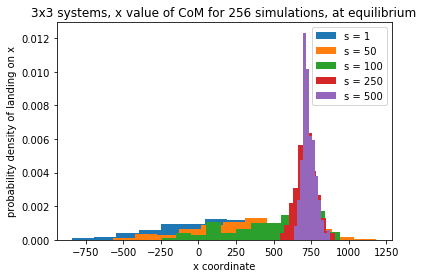

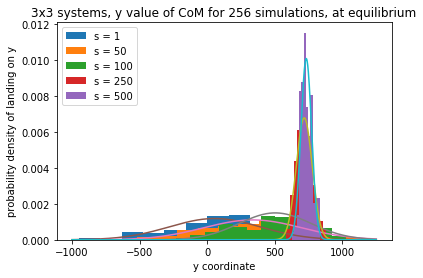

In [4]:
x = np.linspace(-1000, 1250, 1000)
plt.hist(scaling_2[:, 0], bins=12, label='s = 1', density=True)
plt.hist(scaling_6[:, 0], bins=12, label='s = 50', density=True)
plt.hist(scaling_4[:, 0], bins=12, label='s = 100', density=True)
plt.hist(scaling_5[:, 0], bins=12, label='s = 250', density=True)
plt.hist(scaling_3[:, 0], bins=12, label='s = 500', density=True)
plt.legend()
plt.xlabel('x coordinate')
plt.ylabel('probability density of landing on x')
plt.title('3x3 systems, x value of CoM for 256 simulations, at equilibrium')
plt.show()

plt.hist(scaling_2[:, 1], bins=12, label='s = 1', density=True)
plt.hist(scaling_6[:, 1], bins=12, label='s = 50', density=True)
plt.hist(scaling_4[:, 1], bins=12, label='s = 100', density=True)
plt.hist(scaling_5[:, 1], bins=12, label='s = 250', density=True)
plt.hist(scaling_3[:, 1], bins=12, label='s = 500', density=True)
plt.legend()
plt.plot(x, stats.norm.pdf(x, np.mean(scaling_2, axis=0)[1], np.std(scaling_2, axis=0)[1]))
plt.plot(x, stats.norm.pdf(x, np.mean(scaling_6, axis=0)[1], np.std(scaling_6, axis=0)[1]))
plt.plot(x, stats.norm.pdf(x, np.mean(scaling_4, axis=0)[1], np.std(scaling_4, axis=0)[1]))
plt.plot(x, stats.norm.pdf(x, np.mean(scaling_5, axis=0)[1], np.std(scaling_5, axis=0)[1]))
plt.plot(x, stats.norm.pdf(x, np.mean(scaling_3, axis=0)[1], np.std(scaling_3, axis=0)[1]))
plt.xlabel('y coordinate')
plt.ylabel('probability density of landing on y')
plt.title('3x3 systems, y value of CoM for 256 simulations, at equilibrium')
plt.show()

In [13]:
print('MEAN')
print(np.mean(scaling_2, axis=0))
print(np.mean(scaling_6, axis=0))
print(np.mean(scaling_4, axis=0))
print(np.mean(scaling_5, axis=0))
print(np.mean(scaling_3, axis=0))
print('VARIANCE')
np.std(scaling_2, axis=0), np.std(scaling_6, axis=0), np.std(scaling_4, axis=0), np.std(scaling_5, axis=0), np.std(scaling_3, axis=0)

MEAN
[44.82887841 55.94297453]
[312.59848457 336.68190547]
[490.62015231 502.56857445]
[718.33648953 717.31180537]
[733.80268689 732.26512126]
VARIANCE


(array([336.24102926, 337.31879833]),
 array([345.68228653, 361.19608824]),
 array([279.21467372, 266.82339598]),
 array([65.12802553, 58.87176511]),
 array([41.91994701, 39.60026743]))

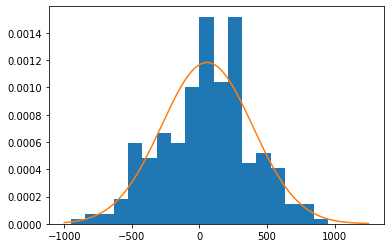

In [7]:
x = np.linspace(-1000, 1250, 1000)
plt.hist(scaling_2[:, 1], bins=18, label='s = 1', density=True)
plt.plot(x, stats.norm.pdf(x, np.mean(scaling_2, axis=0)[1], np.std(scaling_2, axis=0)[1]))

In [2]:
data_1 = np.loadtxt('./Data/com-1.dat')
data_2 = np.loadtxt('./Data/com-2.dat') # Only has 4000 timesteps

data_1_f = np.loadtxt('./Data/com-1-f.dat')
data_50_f = np.loadtxt('./Data/com-50-f.dat')
data_100_1 = np.loadtxt('./Data/com-100-1.dat')
data_100_2 = np.loadtxt('./Data/com-100-2.dat')
data_250_1 = np.loadtxt('./Data/com-250-1.dat')
data_250_2 = np.loadtxt('./Data/com-250-2.dat')
data_500_1 = np.loadtxt('./Data/com-500-1.dat')
data_500_2 = np.loadtxt('./Data/com-500-2.dat')



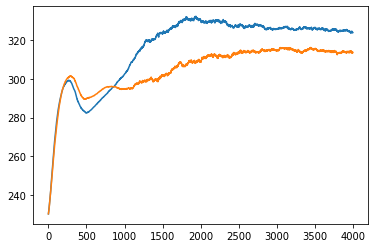

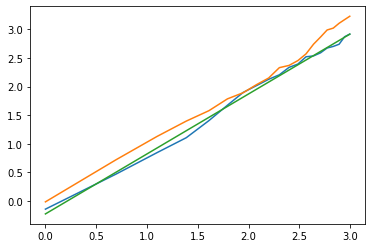

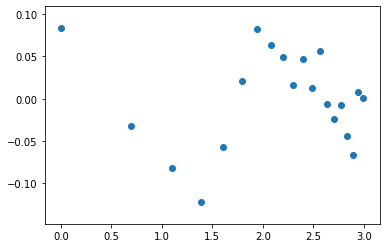

array([ 1.05027133, -0.22952023])

In [3]:
data = np.vstack((data_1, data_2))
split = np.array_split(data, 256)
displacement = np.subtract(split, 230)
m = np.mean(split, axis=0)
msd = np.var(displacement, axis=0)
plt.plot(m)
plt.show()
x = np.log(np.linspace(1, 4000, 4000))[:20]
y = np.log(msd)[:20]
plt.plot(x, y)
popt, pcov = curve_fit(line, x, y[:, 0])
plt.plot(x, line(x, *popt))
plt.show()
plt.scatter(x, y[:, 0]-line(x, *popt))
plt.show()
popt

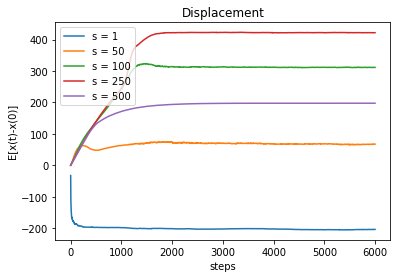

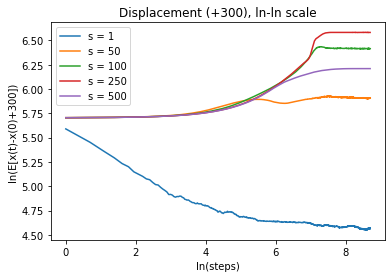

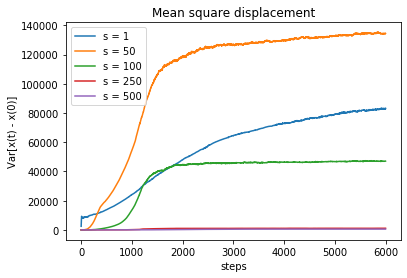

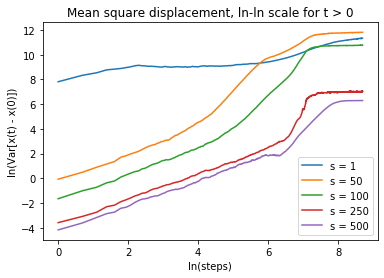

In [4]:
data_100 = np.vstack((data_100_1, data_100_2))
data_250 = np.vstack((data_250_1, data_250_2))
data_500 = np.vstack((data_500_1, data_500_2))

split_1 = np.array_split(data_1_f, 256)
split_50 = np.array_split(data_50_f, 256)
split_100 = np.array_split(data_100, 256)
split_250 = np.array_split(data_250, 256)
split_500 = np.array_split(data_500, 256)

dpt_1 = np.subtract(split_1, 200)
dpt_50 = np.subtract(split_50, 230)
dpt_100 = np.subtract(split_100, 260)
dpt_250 = np.subtract(split_250, 350)
dpt_500 = np.subtract(split_500, 500)

m_1 = np.mean(dpt_1, axis=0)
m_50 = np.mean(dpt_50, axis=0)
m_100 = np.mean(dpt_100, axis=0)
m_250 = np.mean(dpt_250, axis=0)
m_500 = np.mean(dpt_500, axis=0)

msd_1 = np.var(dpt_1, axis=0)
msd_50 = np.var(dpt_50, axis=0)
msd_100 = np.var(dpt_100, axis=0)
msd_250 = np.var(dpt_250, axis=0)
msd_500 = np.var(dpt_500, axis=0)

plt.plot(m_1[:, 0], label='s = 1')
plt.plot(m_50[:, 0], label='s = 50')
plt.plot(m_100[:, 0], label='s = 100')
plt.plot(m_250[:, 0], label='s = 250')
plt.plot(m_500[:, 0], label='s = 500')

plt.legend()
plt.title('Displacement')
plt.xlabel('steps')
plt.ylabel('E[x(t)-x(0)]')
plt.show()

x = np.log(np.linspace(1, 6000, 6000))
plt.plot(x, np.log(m_1[:, 0]+300), label='s = 1')
plt.plot(x, np.log(m_50[:, 0]+300), label='s = 50')
plt.plot(x, np.log(m_100[:, 0]+300), label='s = 100')
plt.plot(x, np.log(m_250[:, 0]+300), label='s = 250')
plt.plot(x, np.log(m_500[:, 0]+300), label='s = 500')

plt.legend()
plt.title('Displacement (+300), ln-ln scale')
plt.xlabel('ln(steps)')
plt.ylabel('ln(E[x(t)-x(0)+300])')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_1[:, 0], label='s = 1')
plt.plot(x, msd_50[:, 0], label='s = 50')
plt.plot(x, msd_100[:, 0], label='s = 100')
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.log(np.linspace(1, 6000, 6000))
plt.plot(x, np.log(msd_1[:, 0]), label='s = 1')
plt.plot(x, np.log(msd_50[:, 0]), label='s = 50')
plt.plot(x, np.log(msd_100[:, 0]), label='s = 100')
plt.plot(x, np.log(msd_250[:, 0]), label='s = 250')
plt.plot(x, np.log(msd_500[:, 0]), label='s = 500')

plt.legend()
plt.title('Mean square displacement, ln-ln scale for t > 0')
plt.xlabel('ln(steps)')
plt.ylabel('ln(Var[x(t) - x(0)])')
plt.show()

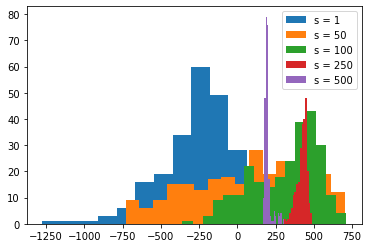

In [5]:
fin_1 = np.subtract(data_1_f[5999::6000], 200)
plt.hist(fin_1[:, 0], 16, density=False, label='s = 1')
fin_50 = np.subtract(data_50_f[5999::6000], 230)
plt.hist(fin_50[:, 0], 16, density=False, label='s = 50')
fin_100 = np.subtract(data_100[5999::6000], 260)
plt.hist(fin_100[:, 0], 16, density=False, label='s = 100')
fin_250 = np.subtract(data_250[5999::6000], 350)
plt.hist(fin_250[:, 0], 16, density=False, label='s = 250')
fin_500 = np.subtract(data_500[5999::6000], 500)
plt.hist(fin_500[:, 0], 16, density=False, label='s = 500')

plt.legend()
plt.show()

In [2]:
data_500_1 = np.loadtxt('./Data/com-500-1.dat')
data_500_2 = np.loadtxt('./Data/com-500-2.dat')
data_500_3 = np.loadtxt('./Data/com-500-3.dat')
data_500_4 = np.loadtxt('./Data/com-500-4.dat')
data_500_5 = np.loadtxt('./Data/com-500-5.dat')
data_500_6 = np.loadtxt('./Data/com-500-6.dat')
# 1024 simulations 

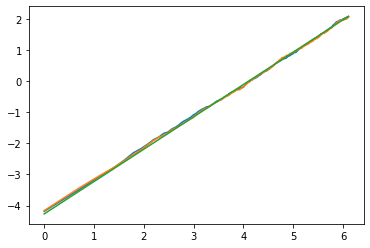

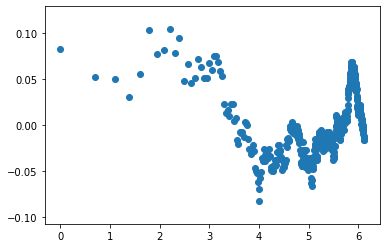

[ 1.03946586 -4.26652189]


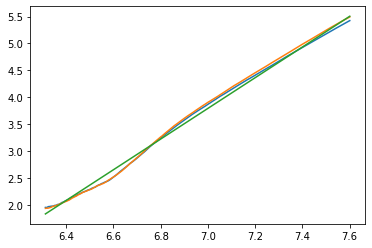

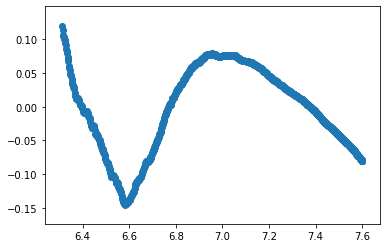

[  2.84303639 -16.10466715]


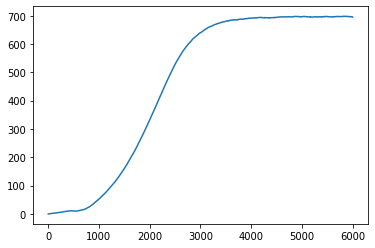

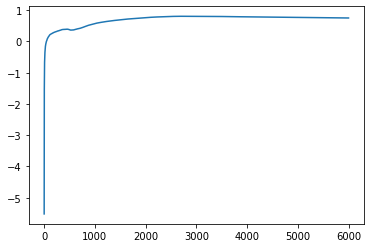

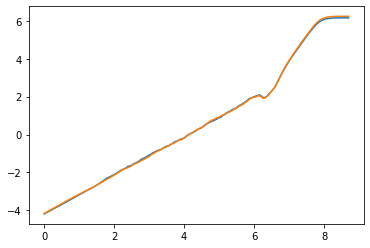

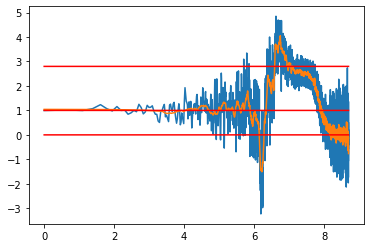

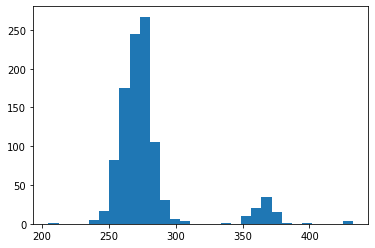

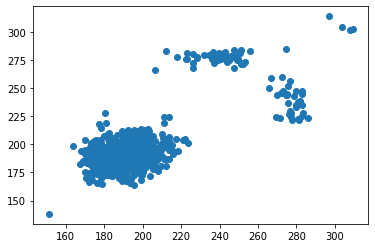

In [47]:
data_500 = np.vstack((data_500_1, data_500_2, data_500_3, data_500_4, data_500_5, data_500_6))
split_500 = np.array_split(data_500, 1024)
dpt_500 = np.subtract(split_500, 500)
m_500 = np.mean(dpt_500, axis=0)
msd_500 = np.var(dpt_500, axis=0)

x = np.log(np.linspace(1, 6000, 6000))[:450]
y = np.log(msd_500)[:450]
plt.plot(x, y)
popt, pcov = curve_fit(line, x, y[:, 0])
plt.plot(x, line(x, *popt))
plt.show()
plt.scatter(x, y[:, 0]-line(x, *popt))
plt.show()
print(popt)

x = np.log(np.linspace(1, 6000, 6000))[550:2000]
y = np.log(msd_500)[550:2000]
plt.plot(x, y)
popt, pcov = curve_fit(line, x, y[:, 0])
plt.plot(x, line(x, *popt))
plt.show()
plt.scatter(x, y[:, 0]-line(x, *popt))
plt.show()
print(popt)

x = np.linspace(2, 6000, 6000)
y = np.linalg.norm(msd_500, axis=1)
plt.plot(x, y)
plt.show()
plt.plot(x, np.log(y)/np.log(x))
plt.show()
x = np.log(np.linspace(1, 6000, 6000))
y = np.log(msd_500)
plt.plot(x, y)
plt.show()


y = y[:, 0]

gradient = grad(y, x, 1, 0)
gradient = np.gradient(y, x)

plt.plot(x, gradient)
smooth = savgol_filter(gradient, 51, 2)
plt.plot(x, smooth)
plt.plot(x, np.zeros(x.size), color='red')
plt.plot(x, np.zeros(x.size)+1, color='red')
plt.plot(x, np.zeros(x.size)+2.8, color='red')
plt.show()

fin_500 = np.subtract(data_500[5999::6000], 500)
plt.hist(np.linalg.norm(fin_500, axis=1), 30, density=False)
plt.show()

plt.scatter(fin_500[:,0], fin_500[:, 1])
plt.show()

In [7]:
data_2_1 = np.loadtxt('./Data/com-2-1.dat')
data_2_50 = np.loadtxt('./Data/com-2-50.dat')
data_2_100 = np.loadtxt('./Data/com-2-100.dat')
data_2_250 = np.loadtxt('./Data/com-2-250.dat')
data_2_500 = np.loadtxt('./Data/com-2-500.dat')

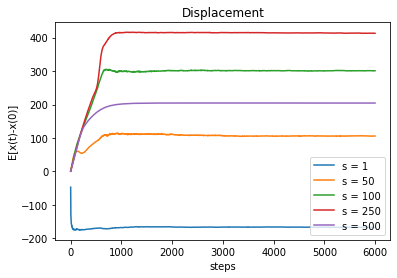

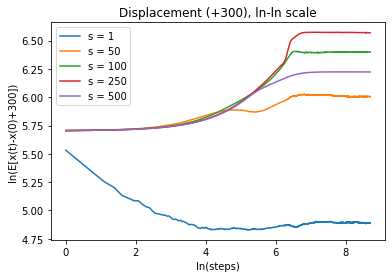

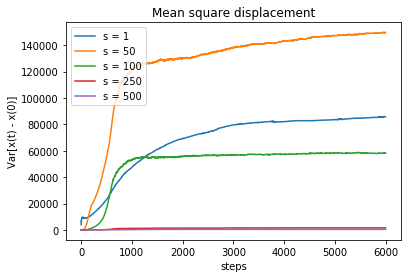

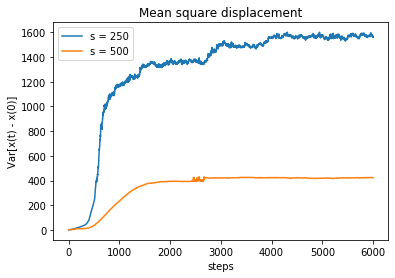

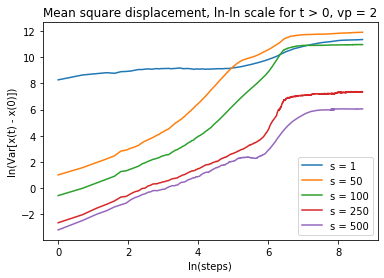

In [74]:
split_1 = np.array_split(data_2_1, 256)
split_50 = np.array_split(data_2_50, 256)
split_100 = np.array_split(data_2_100, 256)
split_250 = np.array_split(data_2_250, 256)
split_500 = np.array_split(data_2_500, 256)

dpt_1 = np.subtract(split_1, 200)
dpt_50 = np.subtract(split_50, 230)
dpt_100 = np.subtract(split_100, 260)
dpt_250 = np.subtract(split_250, 350)
dpt_500 = np.subtract(split_500, 500)

m_1 = np.mean(dpt_1, axis=0)
m_50 = np.mean(dpt_50, axis=0)
m_100 = np.mean(dpt_100, axis=0)
m_250 = np.mean(dpt_250, axis=0)
m_500 = np.mean(dpt_500, axis=0)

msd_1 = np.var(dpt_1, axis=0)
msd_50 = np.var(dpt_50, axis=0)
msd_100 = np.var(dpt_100, axis=0)
msd_250 = np.var(dpt_250, axis=0)
msd_500 = np.var(dpt_500, axis=0)

plt.plot(m_1[:, 0], label='s = 1')
plt.plot(m_50[:, 0], label='s = 50')
plt.plot(m_100[:, 0], label='s = 100')
plt.plot(m_250[:, 0], label='s = 250')
plt.plot(m_500[:, 0], label='s = 500')

plt.legend()
plt.title('Displacement')
plt.xlabel('steps')
plt.ylabel('E[x(t)-x(0)]')
plt.show()

x = np.log(np.linspace(1, 6000, 6000))
plt.plot(x, np.log(m_1[:, 0]+300), label='s = 1')
plt.plot(x, np.log(m_50[:, 0]+300), label='s = 50')
plt.plot(x, np.log(m_100[:, 0]+300), label='s = 100')
plt.plot(x, np.log(m_250[:, 0]+300), label='s = 250')
plt.plot(x, np.log(m_500[:, 0]+300), label='s = 500')

plt.legend()
plt.title('Displacement (+300), ln-ln scale')
plt.xlabel('ln(steps)')
plt.ylabel('ln(E[x(t)-x(0)+300])')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_1[:, 0], label='s = 1')
plt.plot(x, msd_50[:, 0], label='s = 50')
plt.plot(x, msd_100[:, 0], label='s = 100')
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.log(np.linspace(1, 6000, 6000))
plt.plot(x, np.log(msd_1[:, 0]), label='s = 1')
plt.plot(x, np.log(msd_50[:, 0]), label='s = 50')
plt.plot(x, np.log(msd_100[:, 0]), label='s = 100')
plt.plot(x, np.log(msd_250[:, 0]), label='s = 250')
plt.plot(x, np.log(msd_500[:, 0]), label='s = 500')

plt.legend()
plt.title('Mean square displacement, ln-ln scale for t > 0, vp = 2')
plt.xlabel('ln(steps)')
plt.ylabel('ln(Var[x(t) - x(0)])')
plt.show()

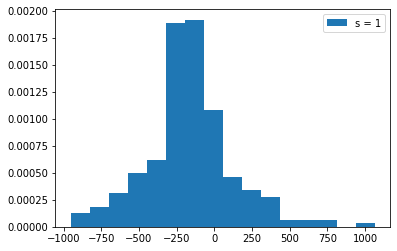

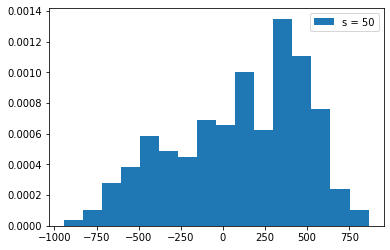

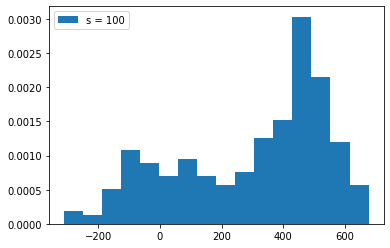

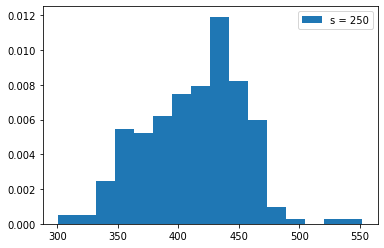

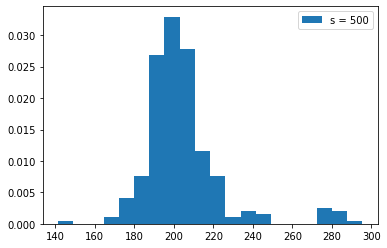

In [56]:
fin_1 = np.subtract(data_2_1[5999::6000], 200)
plt.hist(fin_1[:, 0], 16, density=True, label='s = 1')

plt.legend()
plt.show()
fin_50 = np.subtract(data_2_50[5999::6000], 230)
plt.hist(fin_50[:, 0], 16, density=True, label='s = 50')

plt.legend()
plt.show()

fin_100 = np.subtract(data_2_100[5999::6000], 260)
plt.hist(fin_100[:, 0], 16, density=True, label='s = 100')
plt.legend()
plt.show()
fin_250 = np.subtract(data_2_250[5999::6000], 350)
plt.hist(fin_250[:, 0], 16, density=True, label='s = 250')
plt.legend()
plt.show()
fin_500 = np.subtract(data_2_500[5999::6000], 500)
plt.hist(fin_500[:, 0], 20, density=True, label='s = 500')

plt.legend()
plt.show()

In [6]:
data_10_1 = np.loadtxt('./Data/com-10-1.dat')
data_10_50 = np.loadtxt('./Data/com-10-50.dat')
data_10_100 = np.loadtxt('./Data/com-10-100.dat')
data_10_250 = np.loadtxt('./Data/com-10-250.dat')
data_10_500 = np.loadtxt('./Data/com-10-500.dat')

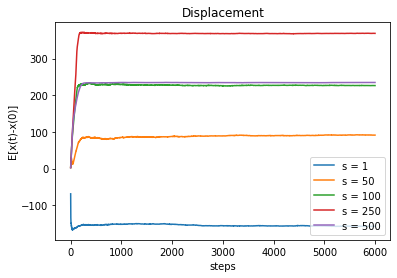

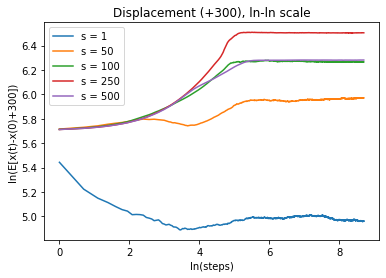

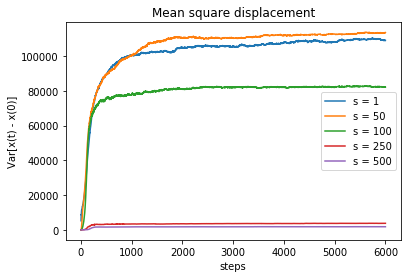

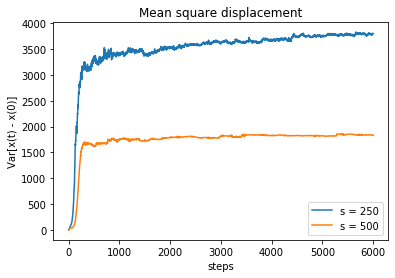

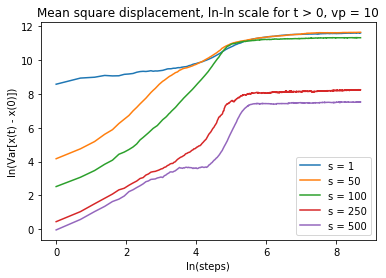

In [7]:
split_1 = np.array_split(data_10_1, 256)
split_50 = np.array_split(data_10_50, 256)
split_100 = np.array_split(data_10_100, 256)
split_250 = np.array_split(data_10_250, 256)
split_500 = np.array_split(data_10_500, 256)

dpt_1 = np.subtract(split_1, 200)
dpt_50 = np.subtract(split_50, 230)
dpt_100 = np.subtract(split_100, 260)
dpt_250 = np.subtract(split_250, 350)
dpt_500 = np.subtract(split_500, 500)

m_1 = np.mean(dpt_1, axis=0)
m_50 = np.mean(dpt_50, axis=0)
m_100 = np.mean(dpt_100, axis=0)
m_250 = np.mean(dpt_250, axis=0)
m_500 = np.mean(dpt_500, axis=0)

msd_1 = np.var(dpt_1, axis=0)
msd_50 = np.var(dpt_50, axis=0)
msd_100 = np.var(dpt_100, axis=0)
msd_250 = np.var(dpt_250, axis=0)
msd_500 = np.var(dpt_500, axis=0)

plt.plot(m_1[:, 0], label='s = 1')
plt.plot(m_50[:, 0], label='s = 50')
plt.plot(m_100[:, 0], label='s = 100')
plt.plot(m_250[:, 0], label='s = 250')
plt.plot(m_500[:, 0], label='s = 500')

plt.legend()
plt.title('Displacement')
plt.xlabel('steps')
plt.ylabel('E[x(t)-x(0)]')
plt.show()

x = np.log(np.linspace(1, 6000, 6000))
plt.plot(x, np.log(m_1[:, 0]+300), label='s = 1')
plt.plot(x, np.log(m_50[:, 0]+300), label='s = 50')
plt.plot(x, np.log(m_100[:, 0]+300), label='s = 100')
plt.plot(x, np.log(m_250[:, 0]+300), label='s = 250')
plt.plot(x, np.log(m_500[:, 0]+300), label='s = 500')

plt.legend()
plt.title('Displacement (+300), ln-ln scale')
plt.xlabel('ln(steps)')
plt.ylabel('ln(E[x(t)-x(0)+300])')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_1[:, 0], label='s = 1')
plt.plot(x, msd_50[:, 0], label='s = 50')
plt.plot(x, msd_100[:, 0], label='s = 100')
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.log(np.linspace(1, 6000, 6000))
plt.plot(x, np.log(msd_1[:, 0]), label='s = 1')
plt.plot(x, np.log(msd_50[:, 0]), label='s = 50')
plt.plot(x, np.log(msd_100[:, 0]), label='s = 100')
plt.plot(x, np.log(msd_250[:, 0]), label='s = 250')
plt.plot(x, np.log(msd_500[:, 0]), label='s = 500')

plt.legend()
plt.title('Mean square displacement, ln-ln scale for t > 0, vp = 10')
plt.xlabel('ln(steps)')
plt.ylabel('ln(Var[x(t) - x(0)])')
plt.show()

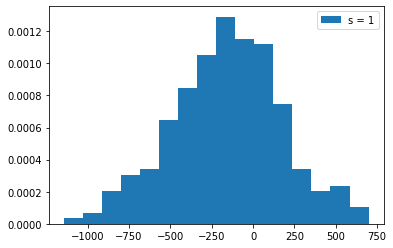

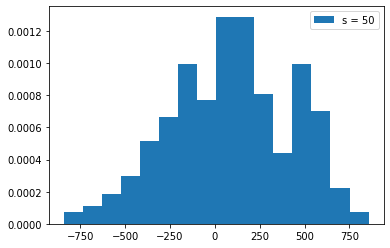

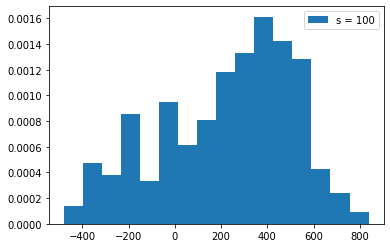

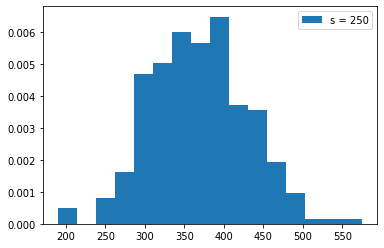

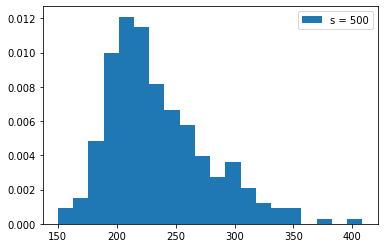

In [8]:
fin_1 = np.subtract(data_10_1[5999::6000], 200)
plt.hist(fin_1[:, 0], 16, density=True, label='s = 1')

plt.legend()
plt.show()
fin_50 = np.subtract(data_10_50[5999::6000], 230)
plt.hist(fin_50[:, 0], 16, density=True, label='s = 50')

plt.legend()
plt.show()

fin_100 = np.subtract(data_10_100[5999::6000], 260)
plt.hist(fin_100[:, 0], 16, density=True, label='s = 100')
plt.legend()
plt.show()
fin_250 = np.subtract(data_10_250[5999::6000], 350)
plt.hist(fin_250[:, 0], 16, density=True, label='s = 250')
plt.legend()
plt.show()
fin_500 = np.subtract(data_10_500[5999::6000], 500)
plt.hist(fin_500[:, 0], 20, density=True, label='s = 500')

plt.legend()
plt.show()

In [3]:
data_1m_1 = np.loadtxt('./Data/com-1m-1.dat')
data_1m_50 = np.loadtxt('./Data/com-1m-50.dat')
data_1m_100 = np.loadtxt('./Data/com-1m-100.dat')
data_1m_250 = np.loadtxt('./Data/com-1m-250.dat')
data_1m_500 = np.loadtxt('./Data/com-1m-500.dat')

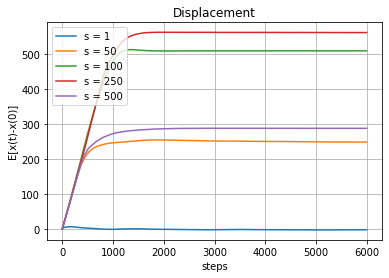

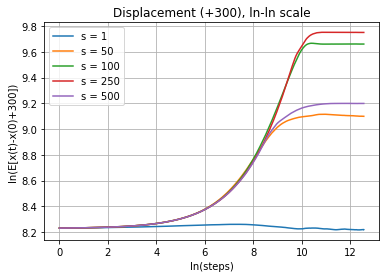

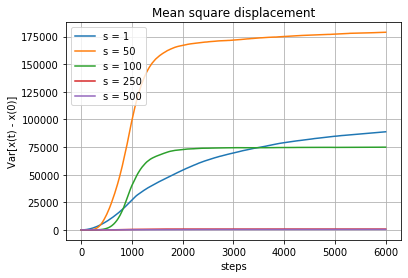

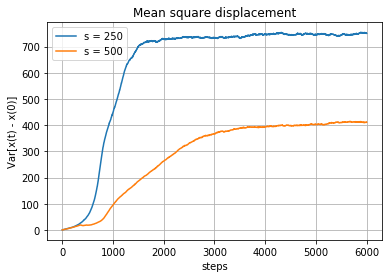

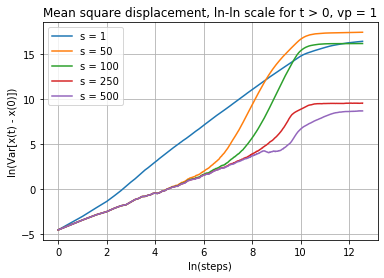

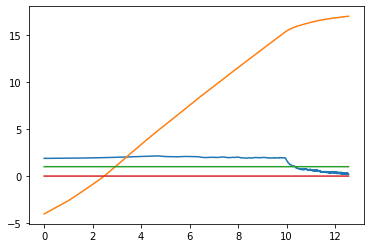

4.643856189774724 2.144693846565646


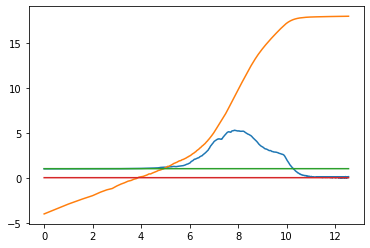

7.845490050944375 5.274107199732212


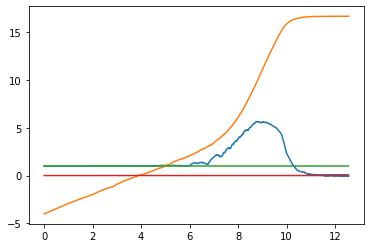

8.81698362325538 5.673600990824387


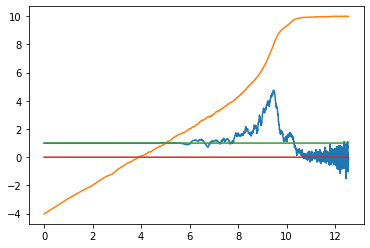

9.45532722030456 4.752200100477703


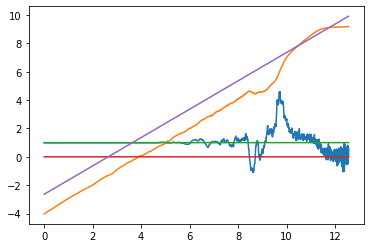

9.710806433699352 4.603264652977812


In [5]:
split_1 = np.array_split(data_1m_1, 256)
split_50 = np.array_split(data_1m_50, 256)
split_100 = np.array_split(data_1m_100, 256)
split_250 = np.array_split(data_1m_250, 256)
split_500 = np.array_split(data_1m_500, 256)

dpt_1 = np.subtract(split_1, 1)
dpt_50 = np.subtract(split_50, 50)
dpt_100 = np.subtract(split_100, 100)
dpt_250 = np.subtract(split_250, 250)
dpt_500 = np.subtract(split_500, 500)

m_1 = np.mean(dpt_1, axis=0)
m_50 = np.mean(dpt_50, axis=0)
m_100 = np.mean(dpt_100, axis=0)
m_250 = np.mean(dpt_250, axis=0)
m_500 = np.mean(dpt_500, axis=0)

msd_1 = np.var(dpt_1, axis=0)
msd_50 = np.var(dpt_50, axis=0)
msd_100 = np.var(dpt_100, axis=0)
msd_250 = np.var(dpt_250, axis=0)
msd_500 = np.var(dpt_500, axis=0)

plt.plot(m_1[:, 0], label='s = 1')
plt.plot(m_50[:, 0], label='s = 50')
plt.plot(m_100[:, 0], label='s = 100')
plt.plot(m_250[:, 0], label='s = 250')
plt.plot(m_500[:, 0], label='s = 500')

plt.grid()
plt.legend()
plt.title('Displacement')
plt.xlabel('steps')
plt.ylabel('E[x(t)-x(0)]')
plt.show()

x = np.log2(np.linspace(1, 6000, 6000))
plt.plot(x, np.log2(m_1[:, 0]+300), label='s = 1')
plt.plot(x, np.log2(m_50[:, 0]+300), label='s = 50')
plt.plot(x, np.log2(m_100[:, 0]+300), label='s = 100')
plt.plot(x, np.log2(m_250[:, 0]+300), label='s = 250')
plt.plot(x, np.log2(m_500[:, 0]+300), label='s = 500')

plt.grid()
plt.legend()
plt.title('Displacement (+300), ln-ln scale')
plt.xlabel('ln(steps)')
plt.ylabel('ln(E[x(t)-x(0)+300])')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_1[:, 0], label='s = 1')
plt.plot(x, msd_50[:, 0], label='s = 50')
plt.plot(x, msd_100[:, 0], label='s = 100')
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.grid()
plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_250[:, 0], label='s = 250')
plt.plot(x, msd_500[:, 0], label='s = 500')

plt.grid()
plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.log2(np.linspace(1, 6000, 6000))
plt.plot(x, np.log2(msd_1[:, 0]), label='s = 1')
plt.plot(x, np.log2(msd_50[:, 0]), label='s = 50')
plt.plot(x, np.log2(msd_100[:, 0]), label='s = 100')
plt.plot(x, np.log2(msd_250[:, 0]), label='s = 250')
plt.plot(x, np.log2(msd_500[:, 0]), label='s = 500')

plt.grid()
plt.legend()
plt.title('Mean square displacement, ln-ln scale for t > 0, vp = 1')
plt.xlabel('ln(steps)')
plt.ylabel('ln(Var[x(t) - x(0)])')
plt.show()

norm = np.linalg.norm(msd_1, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 1')
plt.plot(x, np.log2(norm), label='s = 1')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_50, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 50')
plt.plot(x, np.log2(norm), label='s = 50')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_100, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 100')
plt.plot(x, np.log2(norm), label='s = 100')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_250, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 250')
plt.plot(x, np.log2(norm), label='s = 250')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_500, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 500')
plt.plot(x, np.log2(norm), label='s = 500')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.plot(x, line(x, 1, -2.64))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

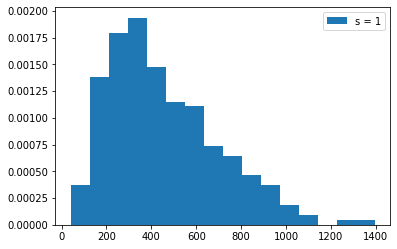

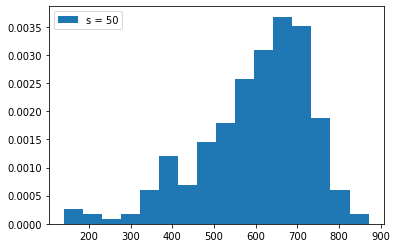

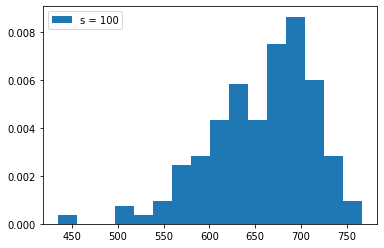

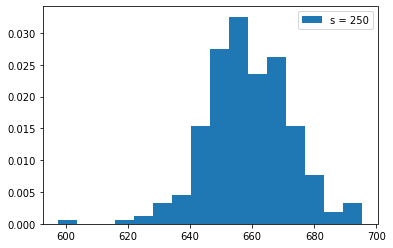

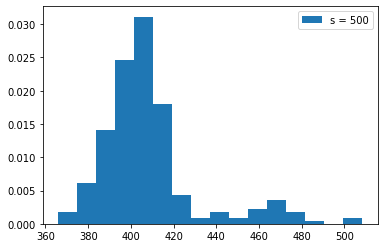

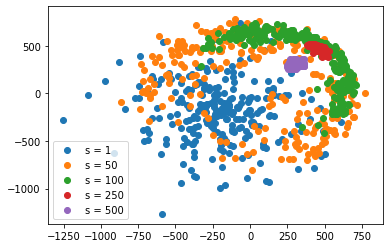

In [9]:
fin_1 = np.subtract(data_1m_1[5999::6000], 200)
plt.hist(np.linalg.norm(fin_1, axis=1), 16, density=True, label='s = 1')

plt.legend()
plt.show()
fin_50 = np.subtract(data_1m_50[5999::6000], 230)
plt.hist(np.linalg.norm(fin_50, axis=1), 16, density=True, label='s = 50')

plt.legend()
plt.show()

fin_100 = np.subtract(data_1m_100[5999::6000], 260)
plt.hist(np.linalg.norm(fin_100, axis=1), 16, density=True, label='s = 100')
plt.legend()
plt.show()
fin_250 = np.subtract(data_1m_250[5999::6000], 350)
plt.hist(np.linalg.norm(fin_250, axis=1), 16, density=True, label='s = 250')
plt.legend()
plt.show()
fin_500 = np.subtract(data_1m_500[5999::6000], 500)
plt.hist(np.linalg.norm(fin_500, axis=1), 16, density=True, label='s = 500')

plt.legend()
plt.show()
plt.scatter(fin_1[:,0], fin_1[:, 1], label='s = 1')

plt.scatter(fin_50[:,0], fin_50[:, 1], label='s = 50')

plt.scatter(fin_100[:,0], fin_100[:, 1], label='s = 100')

plt.scatter(fin_250[:,0], fin_250[:, 1], label='s = 250')

plt.scatter(fin_500[:,0], fin_500[:, 1], label='s = 500')
plt.legend()
plt.show()

In [2]:
data_d0 = np.loadtxt('./Data/com-vd0.dat')
data_d1 = np.loadtxt('./Data/com-vd001.dat')
data_p0 = np.loadtxt('./Data/com-vp0.dat')
data_p1 = np.loadtxt('./Data/com-vp001.dat')

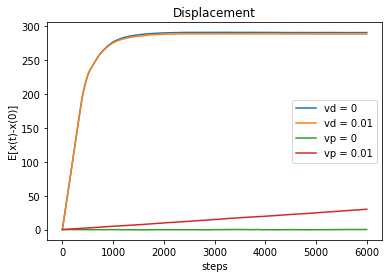

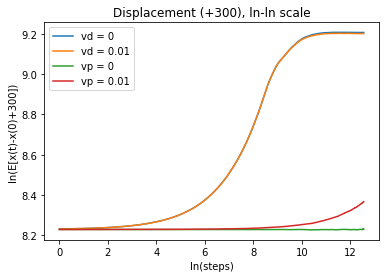

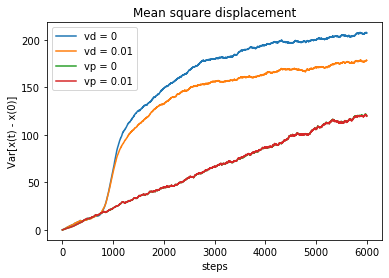

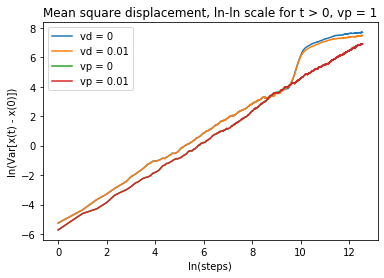

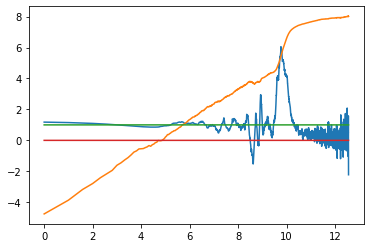

9.761551232444479 6.050317602648525


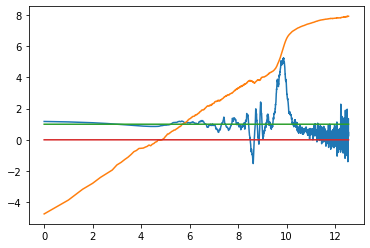

9.873444112515376 5.241365305785176


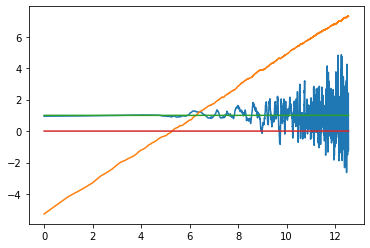

12.254733389246674 4.849149531772021


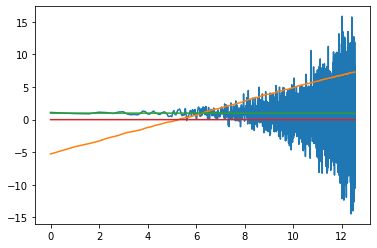

12.027905996569885 15.862850874456853


In [3]:
split_1 = np.array_split(data_d0, 256)
split_50 = np.array_split(data_d1, 256)
split_100 = np.array_split(data_p0, 256)
split_250 = np.array_split(data_p1, 256)

dpt_1 = np.subtract(split_1, 500)
dpt_50 = np.subtract(split_50, 500)
dpt_100 = np.subtract(split_100, 500)
dpt_250 = np.subtract(split_250, 500)

m_1 = np.mean(dpt_1, axis=0)
m_50 = np.mean(dpt_50, axis=0)
m_100 = np.mean(dpt_100, axis=0)
m_250 = np.mean(dpt_250, axis=0)

msd_1 = np.var(dpt_1, axis=0)
msd_50 = np.var(dpt_50, axis=0)
msd_100 = np.var(dpt_100, axis=0)
msd_250 = np.var(dpt_250, axis=0)

plt.plot(m_1[:, 0], label='vd = 0')
plt.plot(m_50[:, 0], label='vd = 0.01')
plt.plot(m_100[:, 0], label='vp = 0')
plt.plot(m_250[:, 0], label='vp = 0.01')

plt.legend()
plt.title('Displacement')
plt.xlabel('steps')
plt.ylabel('E[x(t)-x(0)]')
plt.show()

x = np.log2(np.linspace(1, 6000, 6000))
plt.plot(x, np.log2(m_1[:, 0]+300), label='vd = 0')
plt.plot(x, np.log2(m_50[:, 0]+300), label='vd = 0.01')
plt.plot(x, np.log2(m_100[:, 0]+300), label='vp = 0')
plt.plot(x, np.log2(m_250[:, 0]+300), label='vp = 0.01')

plt.legend()
plt.title('Displacement (+300), ln-ln scale')
plt.xlabel('ln(steps)')
plt.ylabel('ln(E[x(t)-x(0)+300])')
plt.show()

x = np.linspace(1, 6000, 6000)
plt.plot(x, msd_1[:, 0], label='vd = 0')
plt.plot(x, msd_50[:, 0], label='vd = 0.01')
plt.plot(x, msd_100[:, 0], label='vp = 0')
plt.plot(x, msd_250[:, 0], label='vp = 0.01')

plt.legend()
plt.title('Mean square displacement')
plt.xlabel('steps')
plt.ylabel('Var[x(t) - x(0)]')
plt.show()

x = np.log2(np.linspace(1, 6000, 6000))
plt.plot(x, np.log2(msd_1[:, 0]), label='vd = 0')
plt.plot(x, np.log2(msd_50[:, 0]), label='vd = 0.01')
plt.plot(x, np.log2(msd_100[:, 0]), label='vp = 0')
plt.plot(x, np.log2(msd_250[:, 0]), label='vp = 0.01')

plt.legend()
plt.title('Mean square displacement, ln-ln scale for t > 0, vp = 1')
plt.xlabel('ln(steps)')
plt.ylabel('ln(Var[x(t) - x(0)])')
plt.show()

norm = np.linalg.norm(msd_1, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 1')
plt.plot(x, np.log2(norm), label='s = 1')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_50, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 50')
plt.plot(x, np.log2(norm), label='s = 50')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_100, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = savgol_filter(gradient, 51, 2)
plt.plot(x, filtered, label='s = 100')
plt.plot(x, np.log2(norm), label='s = 100')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

norm = np.linalg.norm(msd_250, axis=1)
gradient = np.gradient(np.log2(norm), x)
filtered = gradient
plt.plot(x, filtered, label='s = 250')
plt.plot(x, np.log2(norm), label='s = 250')
plt.plot(x, np.zeros(x.size)+1)
plt.plot(x, np.zeros(x.size))
plt.show()
print(np.log2(np.argmax(filtered)), np.amax(filtered))

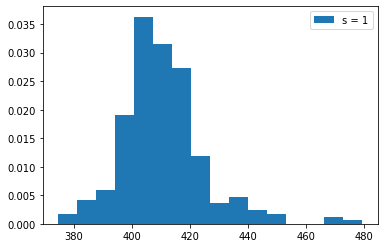

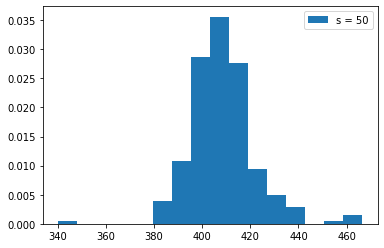

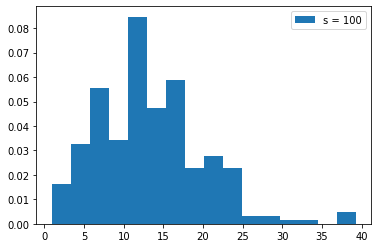

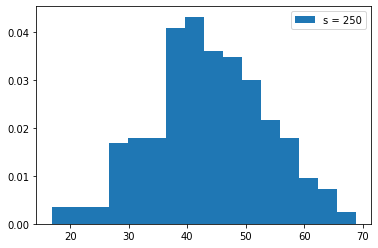

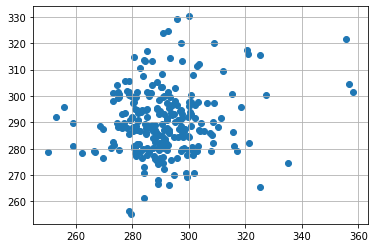

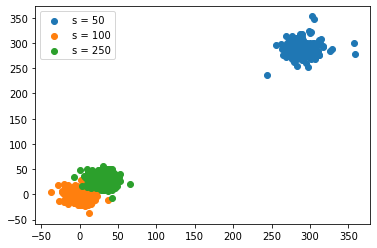

In [37]:
fin_1 = np.subtract(data_d0[5999::6000], 500)
plt.hist(np.linalg.norm(fin_1, axis=1), 16, density=True, label='s = 1')

plt.legend()
plt.show()
fin_50 = np.subtract(data_d1[5999::6000], 500)
plt.hist(np.linalg.norm(fin_50, axis=1), 16, density=True, label='s = 50')

plt.legend()
plt.show()

fin_100 = np.subtract(data_p0[5999::6000], 500)
plt.hist(np.linalg.norm(fin_100, axis=1), 16, density=True, label='s = 100')
plt.legend()
plt.show()
fin_250 = np.subtract(data_p1[5999::6000], 500)
plt.hist(np.linalg.norm(fin_250, axis=1), 16, density=True, label='s = 250')
plt.legend()
plt.show()
plt.scatter(fin_1[:,0], fin_1[:, 1], label='s = 1')
plt.grid()
plt.show()
plt.scatter(fin_50[:,0], fin_50[:, 1], label='s = 50')

plt.scatter(fin_100[:,0], fin_100[:, 1], label='s = 100')

plt.scatter(fin_250[:,0], fin_250[:, 1], label='s = 250')

plt.legend()
plt.show()

In [3]:
data_500_l1 = np.loadtxt('./Data/com-500_l1.dat')
data_500_l2 = np.loadtxt('./Data/com-500_l2.dat')
data_500_l3 = np.loadtxt('./Data/com-500_l3.dat')
data_500_l4 = np.loadtxt('./Data/com-500_l4.dat')
data_500_l5 = np.loadtxt('./Data/com-500_l5.dat')

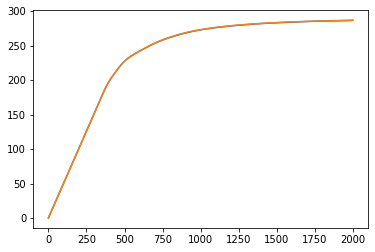

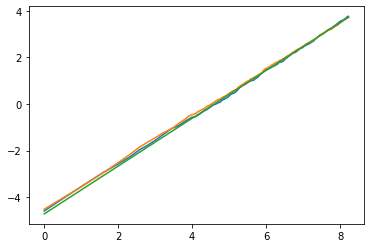

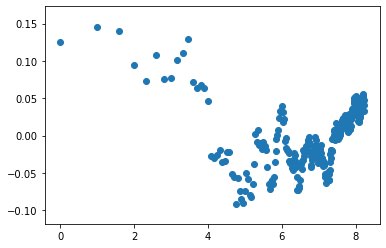

[ 1.02691676 -4.71765013]


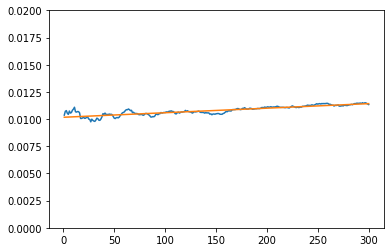

[4.18115867e-06 1.01661570e-02]


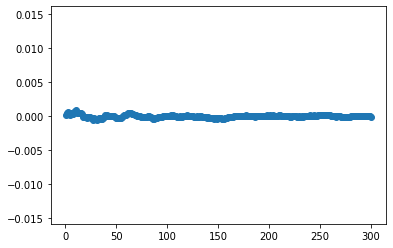

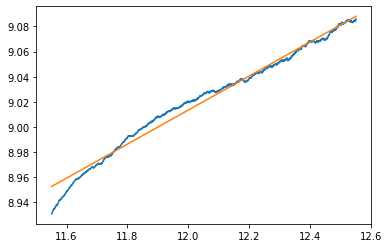

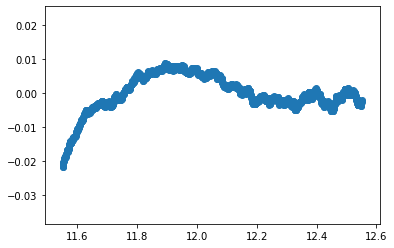

[0.13556784 7.38662782]


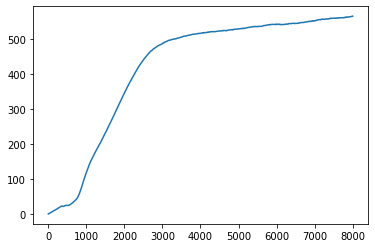

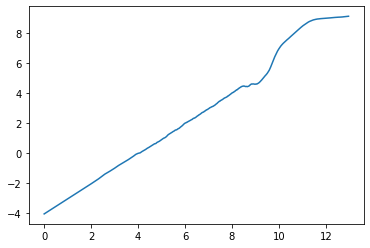

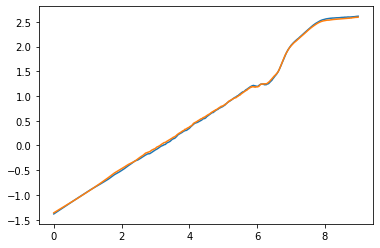

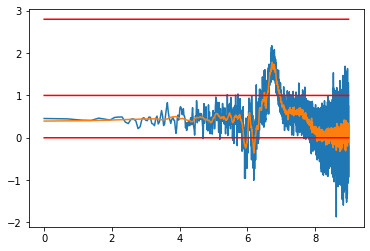

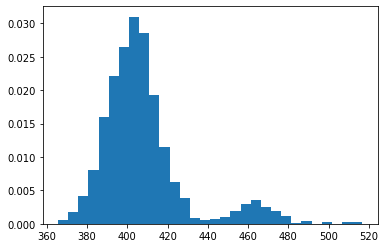

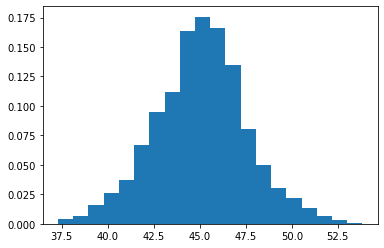

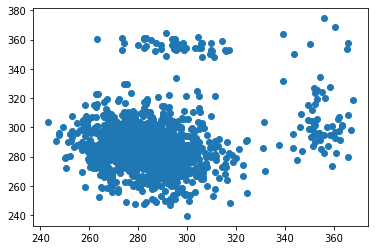

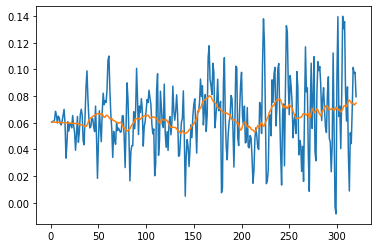

In [35]:
data_500 = np.vstack((data_500_l1, data_500_l2, data_500_l3, data_500_l4, data_500_l5))
split_500 = np.array_split(data_500, 1280)
dpt_500 = np.subtract(split_500, 500)
m_500 = np.mean(dpt_500, axis=0)[:2000]
msd_500 = np.var(dpt_500, axis=0)

plt.plot(m_500)
plt.show()
x = np.log2(np.linspace(1, 8000, 8000))[:300]
y = np.log2(msd_500)[:300]
plt.plot(x, y)
popt, pcov = curve_fit(line, x, y[:, 0])
plt.plot(x, line(x, *popt))
plt.show()
plt.scatter(x, y[:, 0]-line(x, *popt))
plt.show()
print(popt)

x = np.linspace(1, 8000, 8000)[:300]
y = np.divide(msd_500[:300][:, 0], 4*x)
ax = plt.gca()
ax.set_ylim(0, 0.02)
plt.plot(x, y)

popt, pcov = curve_fit(line, x, y)
plt.plot(x, line(x, *popt))
plt.show()
print(popt)
plt.scatter(x, y-line(x, *popt))
plt.show()

x = np.log2(np.linspace(1, 8000, 8000))[3000:6000]
norm = np.linalg.norm(msd_500, axis=1)
y = np.log2(norm)[3000:6000]
plt.plot(x, y)
popt, pcov = curve_fit(line, x, y)
plt.plot(x, line(x, *popt))
plt.show()
plt.scatter(x, y-line(x, *popt))
plt.show()
print(popt)

x = np.linspace(1, 8000, 8000)
y = np.linalg.norm(msd_500, axis=1)
plt.plot(x, y)
plt.show()
plt.plot(np.log2(x), np.log2(y))
plt.show()
x = np.log(np.linspace(1, 8000, 8000))
y = np.log10(msd_500)
plt.plot(x, y)
plt.show()


y = y[:, 0]

gradient = np.gradient(y, x)

plt.plot(x, gradient)
smooth = savgol_filter(gradient, 51, 2)
plt.plot(x, smooth)
plt.plot(x, np.zeros(x.size), color='red')
plt.plot(x, np.zeros(x.size)+1, color='red')
plt.plot(x, np.zeros(x.size)+2.8, color='red')
plt.show()

fin_500 = np.subtract(data_500[7999::8000], 500)
plt.hist(np.linalg.norm(fin_500, axis=1), 30, density=True)
plt.show()

plt.hist(np.arctan2(fin_500[:, 1], fin_500[:, 0])*180/np.pi, 20, density=True)
plt.show()

plt.scatter(fin_500[:,0], fin_500[:, 1])
plt.show()

x = np.linspace(1, 8000, 8000)[:320]
plt.plot(x, np.gradient(norm)[:320])
plt.plot(x, savgol_filter(np.gradient(norm), 51, 2)[:320])
plt.show()

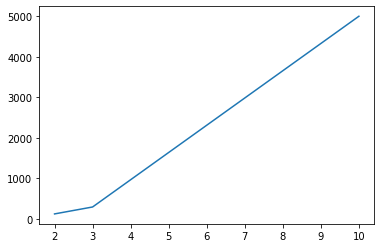

In [40]:
array = np.array([125, 296, 5000])
x = np.array([2, 3, 10])
plt.plot(x, array)

(250, 320)

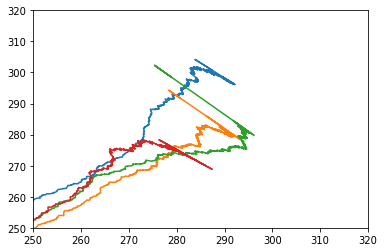

In [26]:

plt.plot(dpt_500[1][:, 0], dpt_500[1][:, 1])
plt.plot(dpt_500[2][:, 0], dpt_500[2][:, 1])
plt.plot(dpt_500[3][:, 0], dpt_500[3][:, 1])
plt.plot(dpt_500[4][:, 0], dpt_500[4][:, 1])
ax = plt.gca()
ax.set_xlim(250, 320)
ax.set_ylim(250, 320)

In [39]:
phase_10 = np.loadtxt('./Data/phase-10.dat')

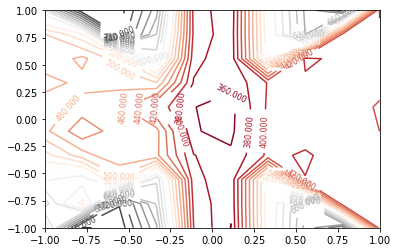

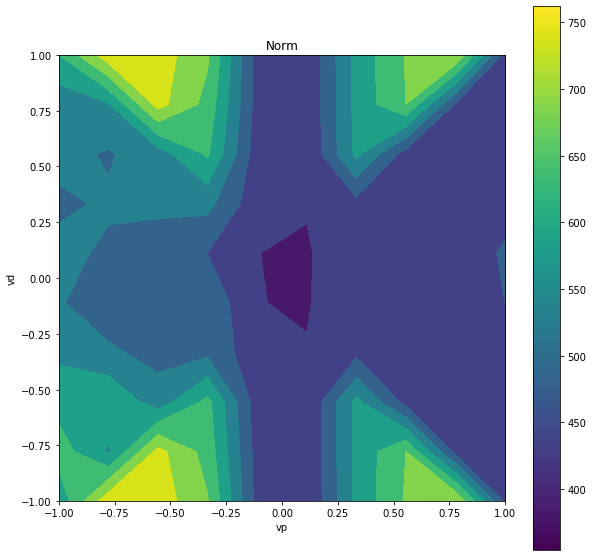

In [40]:
data = np.linalg.norm(phase_10-500, axis=1)
gridsize = 10
x = np.linspace(-1, 1, gridsize)
y = np.linspace(-1, 1, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (10, 10))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-1, 1, -1, 1], alpha=1)
plt.colorbar()
plt.show()

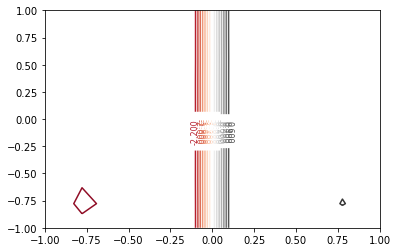

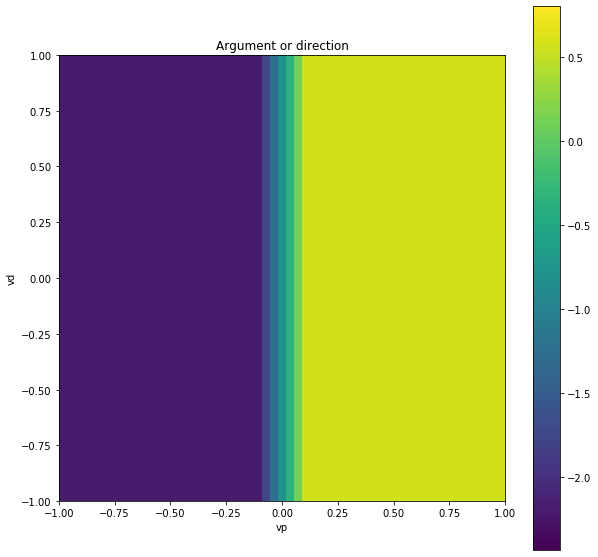

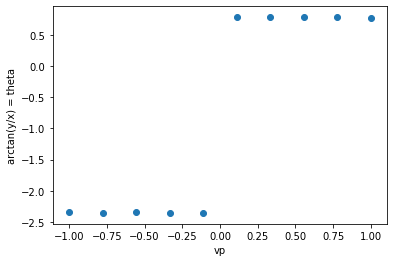

In [41]:
data = np.arctan2(np.subtract(phase_10, 500)[:, 1], np.subtract(phase_10, 500)[:, 0])
gridsize = 10
x = np.linspace(-1, 1, gridsize)
y = np.linspace(-1, 1, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (10, 10))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Argument or direction')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-1, 1, -1, 1], alpha=1)
plt.colorbar()
plt.show()
x = np.linspace(-1, 1, 10)
y = np.mean(np.transpose(z), axis=1)
plt.scatter(x, y)
plt.xlabel('vp')
plt.ylabel('arctan(y/x) = theta')
plt.show()

In [36]:
phase_05_20_1 = np.loadtxt('./Data/phase-05-20.dat')
phase_05_20 = phase_05_20_1 - 500

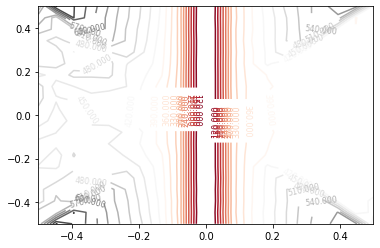

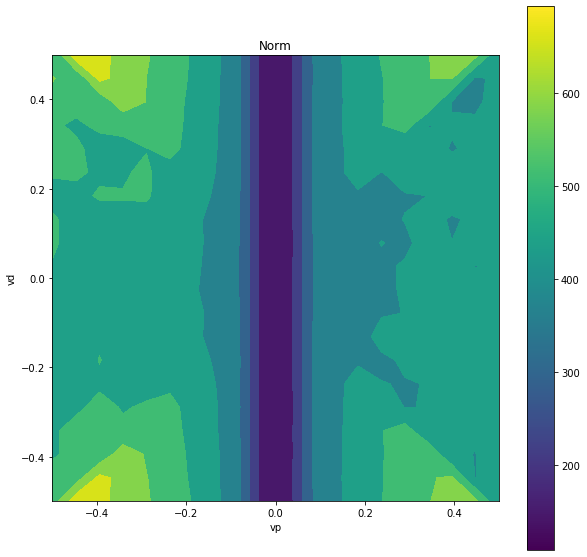

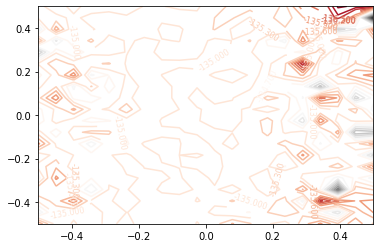

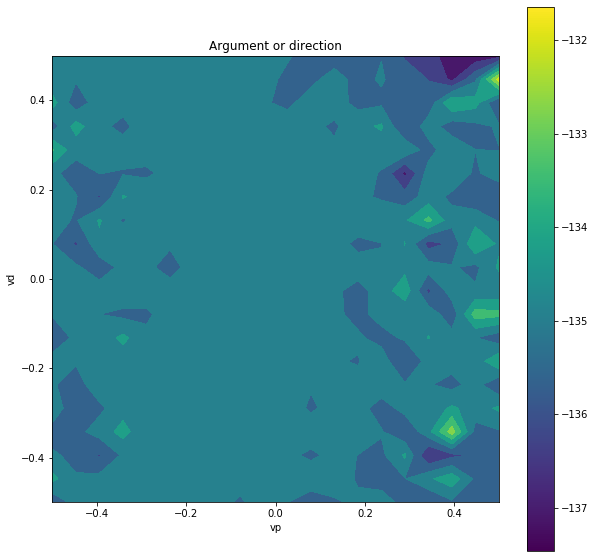

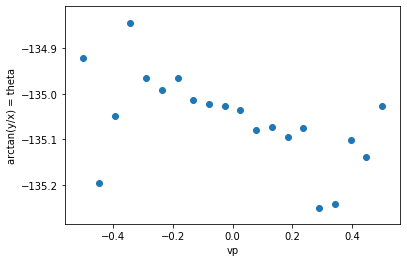

In [38]:
data = np.linalg.norm(phase_05_20, axis=1)
gridsize = 20
x = np.linspace(-0.5, 0.5, gridsize)
y = np.linspace(-0.5, 0.5, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (20, 20))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-0.5, 0.5, -0.5, 0.5], alpha=1)
plt.colorbar()
plt.show()

data = np.arctan2(np.subtract(phase_05_20, 500)[:, 1], np.subtract(phase_05_20, 500)[:, 0])*180/np.pi
x = np.linspace(-0.5, 0.5, gridsize)
y = np.linspace(-0.5, 0.5, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (20, 20))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Argument or direction')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-0.5, 0.5, -0.5, 0.5], alpha=1)
plt.colorbar()
plt.show()
x = np.linspace(-0.5, 0.5, 20)
y = np.mean(np.transpose(z), axis=1)
plt.scatter(x, y)
plt.xlabel('vp')
plt.ylabel('arctan(y/x) = theta')
plt.show()

In [43]:
phase_10_20 = np.loadtxt('./Data/phase-10-20.dat')

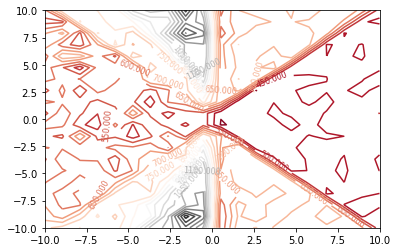

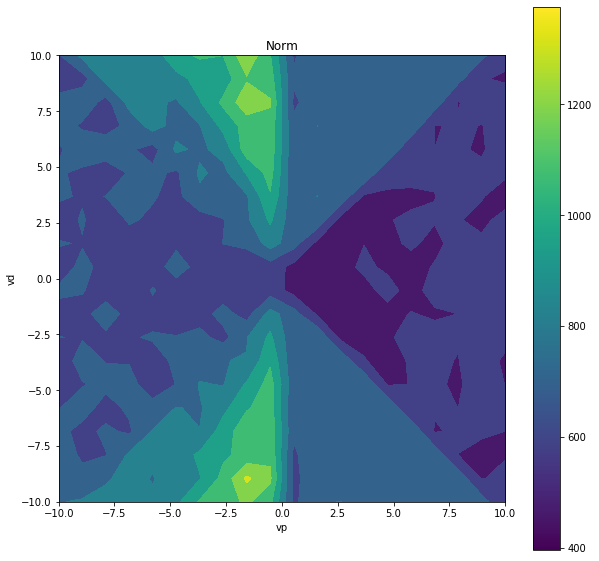

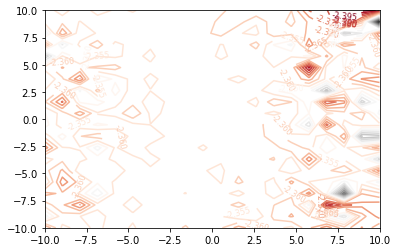

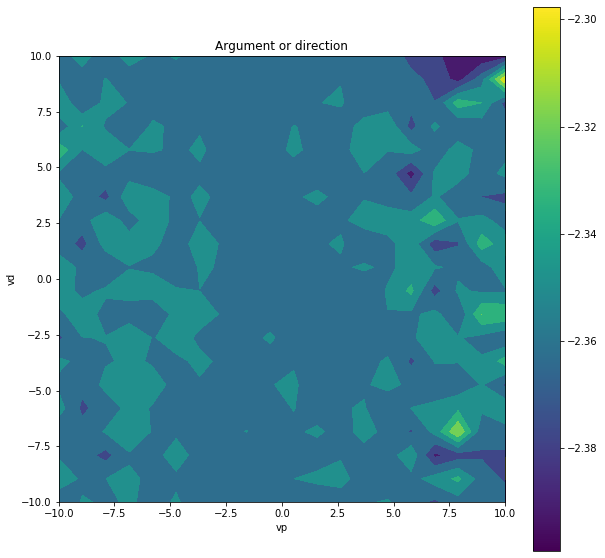

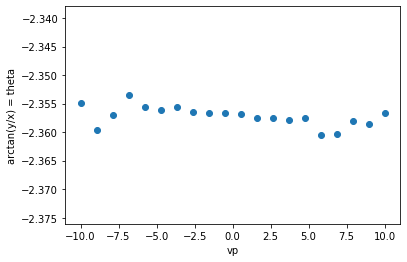

In [44]:
data = np.linalg.norm(phase_10_20-500, axis=1)
gridsize = 20
x = np.linspace(-10, 10, gridsize)
y = np.linspace(-10, 10, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (20, 20))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-10, 10, -10, 10], alpha=1)
plt.colorbar()
plt.show()

data = np.arctan2(np.subtract(phase_05_20, 500)[:, 1], np.subtract(phase_05_20, 500)[:, 0])
x = np.linspace(-10, 10, gridsize)
y = np.linspace(-10, 10, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (20, 20))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Argument or direction')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-10, 10, -10, 10], alpha=1)
plt.colorbar()
plt.show()
x = np.linspace(-10, 10, 20)
y = np.mean(np.transpose(z), axis=1)
plt.scatter(x, y)
plt.xlabel('vp')
plt.ylabel('arctan(y/x) = theta')
plt.show()

In [16]:
phase_5_20 = np.loadtxt('./Data/phase-5-20.dat')

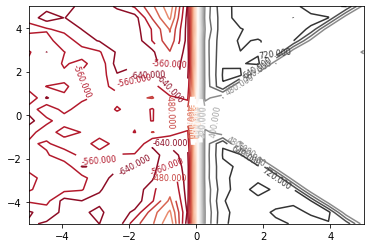

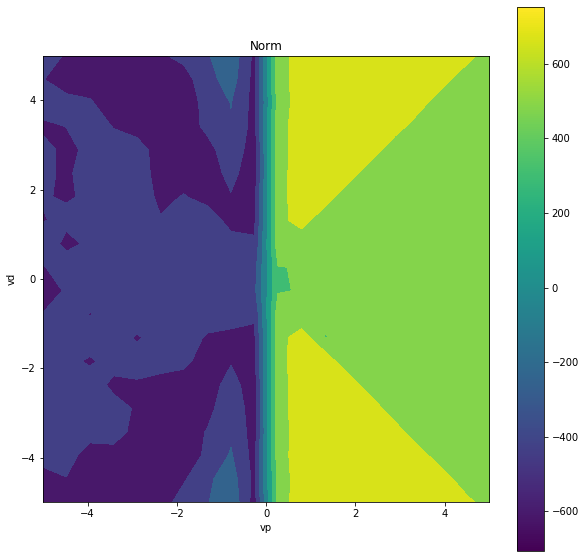

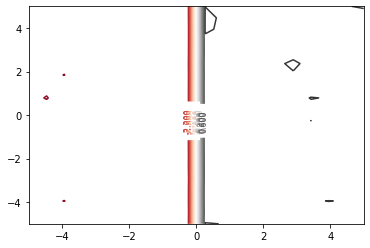

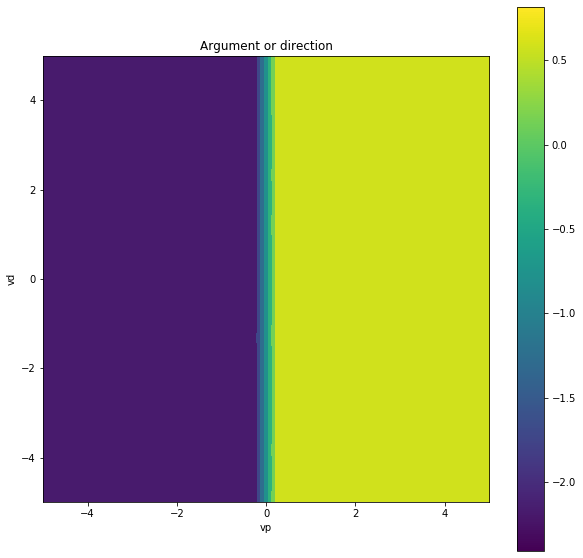

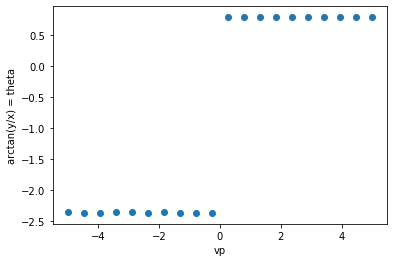

In [17]:
data = np.linalg.norm(phase_5_20, axis=1)-707
gridsize = 20
x = np.linspace(-5, 5, gridsize)
y = np.linspace(-5, 5, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (20, 20))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-5, 5, -5, 5], alpha=1)
plt.colorbar()
plt.show()

data = np.arctan2(np.subtract(phase_05_20, 500)[:, 1], np.subtract(phase_05_20, 500)[:, 0])
x = np.linspace(-5, 5, gridsize)
y = np.linspace(-5, 5, gridsize)
z = np.zeros((gridsize, gridsize))
z = np.reshape(data, (20, 20))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Argument or direction')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-5, 5, -5, 5], alpha=1)
plt.colorbar()
plt.show()
x = np.linspace(-5, 5, 20)
y = np.mean(np.transpose(z), axis=1)
plt.scatter(x, y)
plt.xlabel('vp')
plt.ylabel('arctan(y/x) = theta')
plt.show()

In [3]:
data_long = np.loadtxt('./Data/com-long.dat')

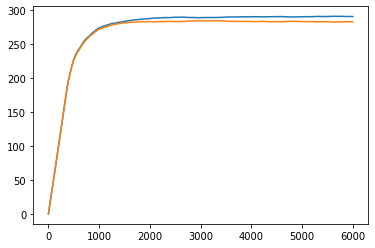

In [4]:
split_long = np.array_split(data_long, 20)
dpt_long = np.subtract(split_long, 500)
m_long = np.mean(dpt_long, axis=0)[:6000]
plt.plot(m_long)

In [5]:
fin = np.subtract(data_long[19999::20000], 500)

plt.scatter(fin_500[:,0], fin_500[:, 1])
plt.scatter(fin[:, 0], fin[:, 1])
plt.show()

NameError: name 'fin_500' is not defined

In [6]:
phase_long = np.loadtxt('./Data/phase-long.dat')

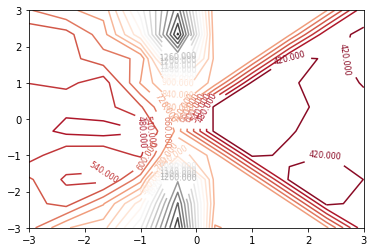

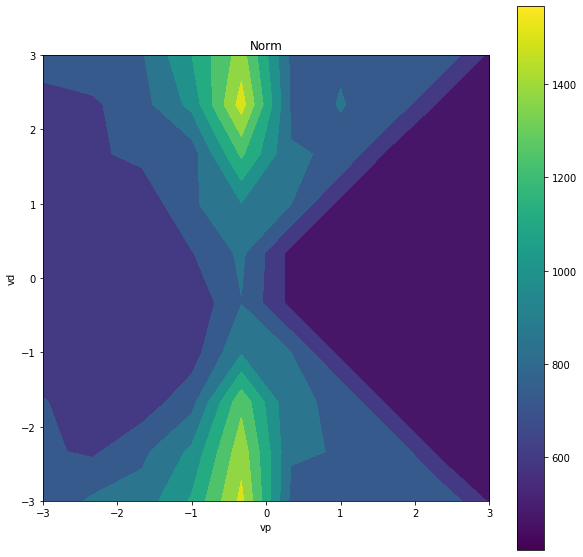

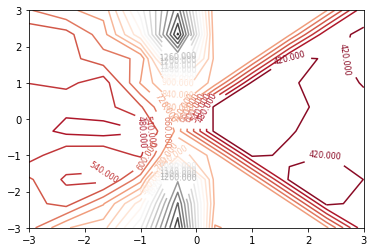

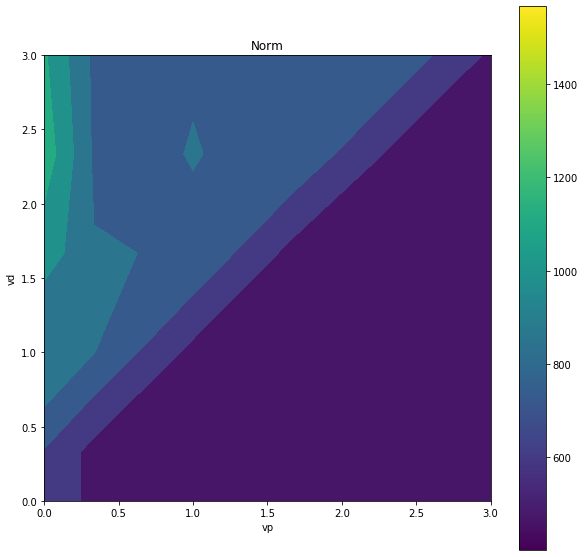

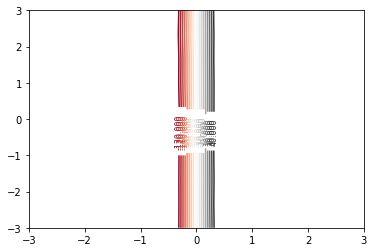

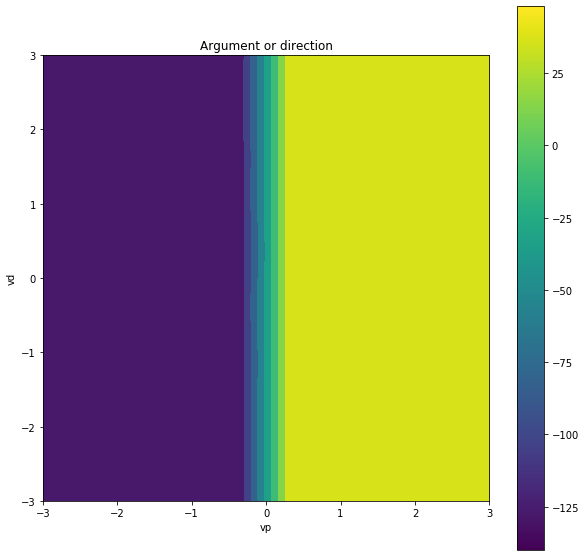

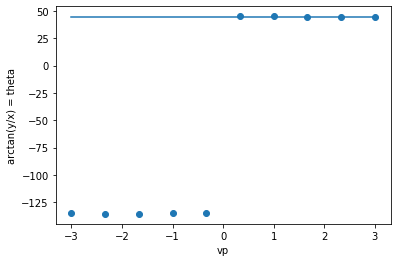

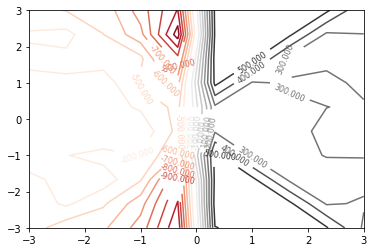

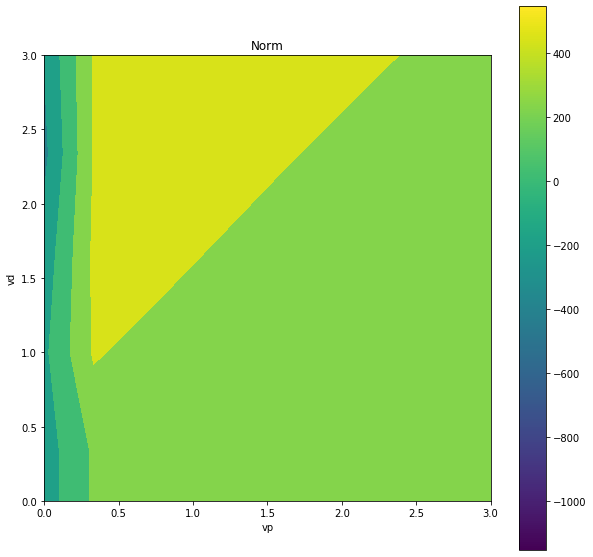

In [7]:
dpt = np.subtract(phase_long, 500)

data = np.linalg.norm(dpt, axis=1)
gridsize = 10
lim = 3
x = np.linspace(-lim, lim, gridsize)
y = np.linspace(-lim, lim, gridsize)
z = np.reshape(data, (gridsize, gridsize))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-lim, lim, -lim, lim], alpha=1)
plt.colorbar()
plt.show()

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[0, lim, 0, lim], alpha=1)
plt.colorbar()
plt.show()

data = np.arctan2(dpt[:, 1], dpt[:, 0])*180/np.pi
x = np.linspace(-lim, lim, gridsize)
y = np.linspace(-lim, lim, gridsize)
z = np.reshape(data, (gridsize, gridsize))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Argument or direction')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[-lim, lim, -lim, lim], alpha=1)
plt.colorbar()
plt.show()
x = np.linspace(-lim, lim, gridsize)
y = np.mean(np.transpose(z), axis=1)
plt.scatter(x, y)
plt.xlabel('vp')
plt.ylabel('arctan(y/x) = theta')
plt.plot(x, np.ones(x.size)+44)
plt.show()


data = dpt[:, 1]
gridsize = 10
lim = 3
x = np.linspace(-lim, lim, gridsize)
y = np.linspace(-lim, lim, gridsize)
z = np.reshape(data, (gridsize, gridsize))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[0, lim, 0, lim], alpha=1)
plt.colorbar()
plt.show()

data = dpt[:, 1]
gridsize = 10
lim = 3
x = np.linspace(-lim, lim, gridsize)
y = np.linspace(-lim, lim, gridsize)
z = np.reshape(data, (gridsize, gridsize))

contours = plt.contour(x, y, z, 20, cmap='RdGy');
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(x, y, z)
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Norm')
plt.xlabel('vp')
plt.ylabel('vd')
plt.imshow(z, extent=[0, lim, 0, lim], alpha=1)
plt.colorbar()
plt.show()

In [8]:
data_pol_1 = np.loadtxt('./Data/com-pol_1.dat')
data_pol_2 = np.loadtxt('./Data/com-pol_2.dat')
data_pol_3 = np.loadtxt('./Data/com-pol_3.dat')
data_pol_4 = np.loadtxt('./Data/com-pol_4.dat')

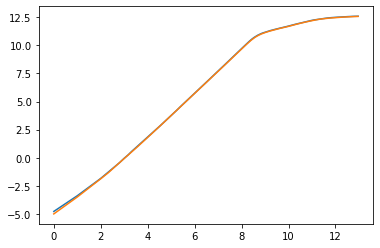

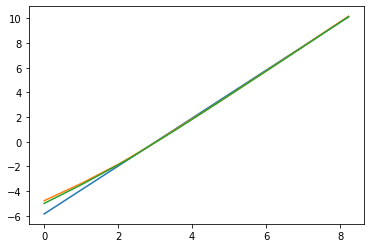

[ 1.94184371 -5.85807013]


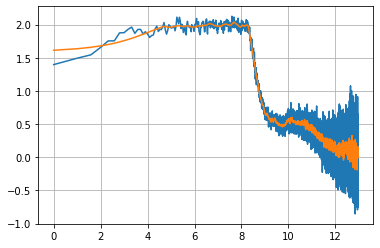

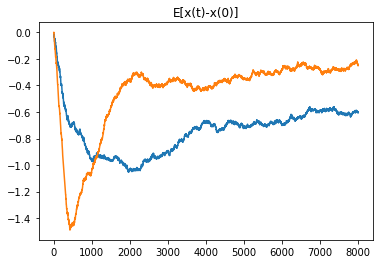

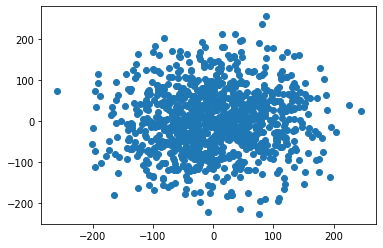

In [44]:
data_pol = np.vstack((data_pol_1, data_pol_2, data_pol_3, data_pol_4))
split_pol = np.array_split(data_pol, 1024)
dpt_pol = np.subtract(split_pol, 1000)
m_pol = np.mean(dpt_pol, axis=0)
msd_pol = np.var(dpt_pol, axis=0)

x = np.log2(np.linspace(1, 8000, 8000))
y = np.log2(msd_pol)
plt.plot(x, y)
plt.show()

x = np.log2(np.linspace(1, 8000, 8000))[:300]
y = np.log2(msd_pol)[:300]
popt, pcov = curve_fit(line, x, y[:, 0])
plt.plot(x, line(x, *popt))
plt.plot(x, y)
plt.show()
print(popt)

x = np.log2(np.linspace(1, 8000, 8000))
y = np.log2(msd_pol)
plt.plot(x, np.gradient(y[:, 0], x))
plt.plot(x, savgol_filter(np.gradient(y[:, 0], x), 51, 2))
plt.grid()
plt.show()

x = np.linspace(1, 8000, 8000)
y = m_pol
plt.title('E[x(t)-x(0)]')
plt.plot(x, y)
plt.show()

fin = np.subtract(data_pol[7999::8000], 1000)
plt.scatter(fin[:, 0], fin[:, 1])
plt.show()